<a href="https://colab.research.google.com/github/juharrais/FIESC/blob/main/Questao3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Sun Oct 29 19:11:34 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.8/644.8 kB 10.0 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo mode=checls

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 392, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=checls'. Valid modes are ('train', 'val', 'predict', 'export', 'track', 'benchmark').

    Arguments received: ['yolo', 'mode=checls']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of ('detect', 'segment', 'classify', 'pose')
                MODE (required) is one of ('train', 'val', 'predict', 'export', 'track', 'benchmark')
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at https://docs.ultralytics.com/usage/cfg or with 'yolo cfg'

    1. Train a detection model for 10 epochs with an i

In [ ]:
!pip install fastapi
!pip install kaleido
!pip install python-multipart
!pip install uvicorn
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 5.6 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
tensorflow-probability 0.22.0 requires typing-extensions<4.6.0, but you have typing-extensions 4.8.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that a

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ceevMh0m0A64WMqvwMIg")
project = rf.workspace("juliana-eqjxo").project("questao3")
dataset = project.version(1).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.202, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to questao3-1 in yolov8:: 100%|██████████| 452/452 [00:00<00:00, 4610.18it/s]


In [ ]:
!yolo task=segment mode=train model=yolov8n-seg.pt data={dataset.location}/data.yaml epochs=20 imgsz=640

100% 6.73M/6.73M [00:00<00:00, 194MB/s]
Ultralytics YOLOv8.0.202 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/questao3-1/data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, b

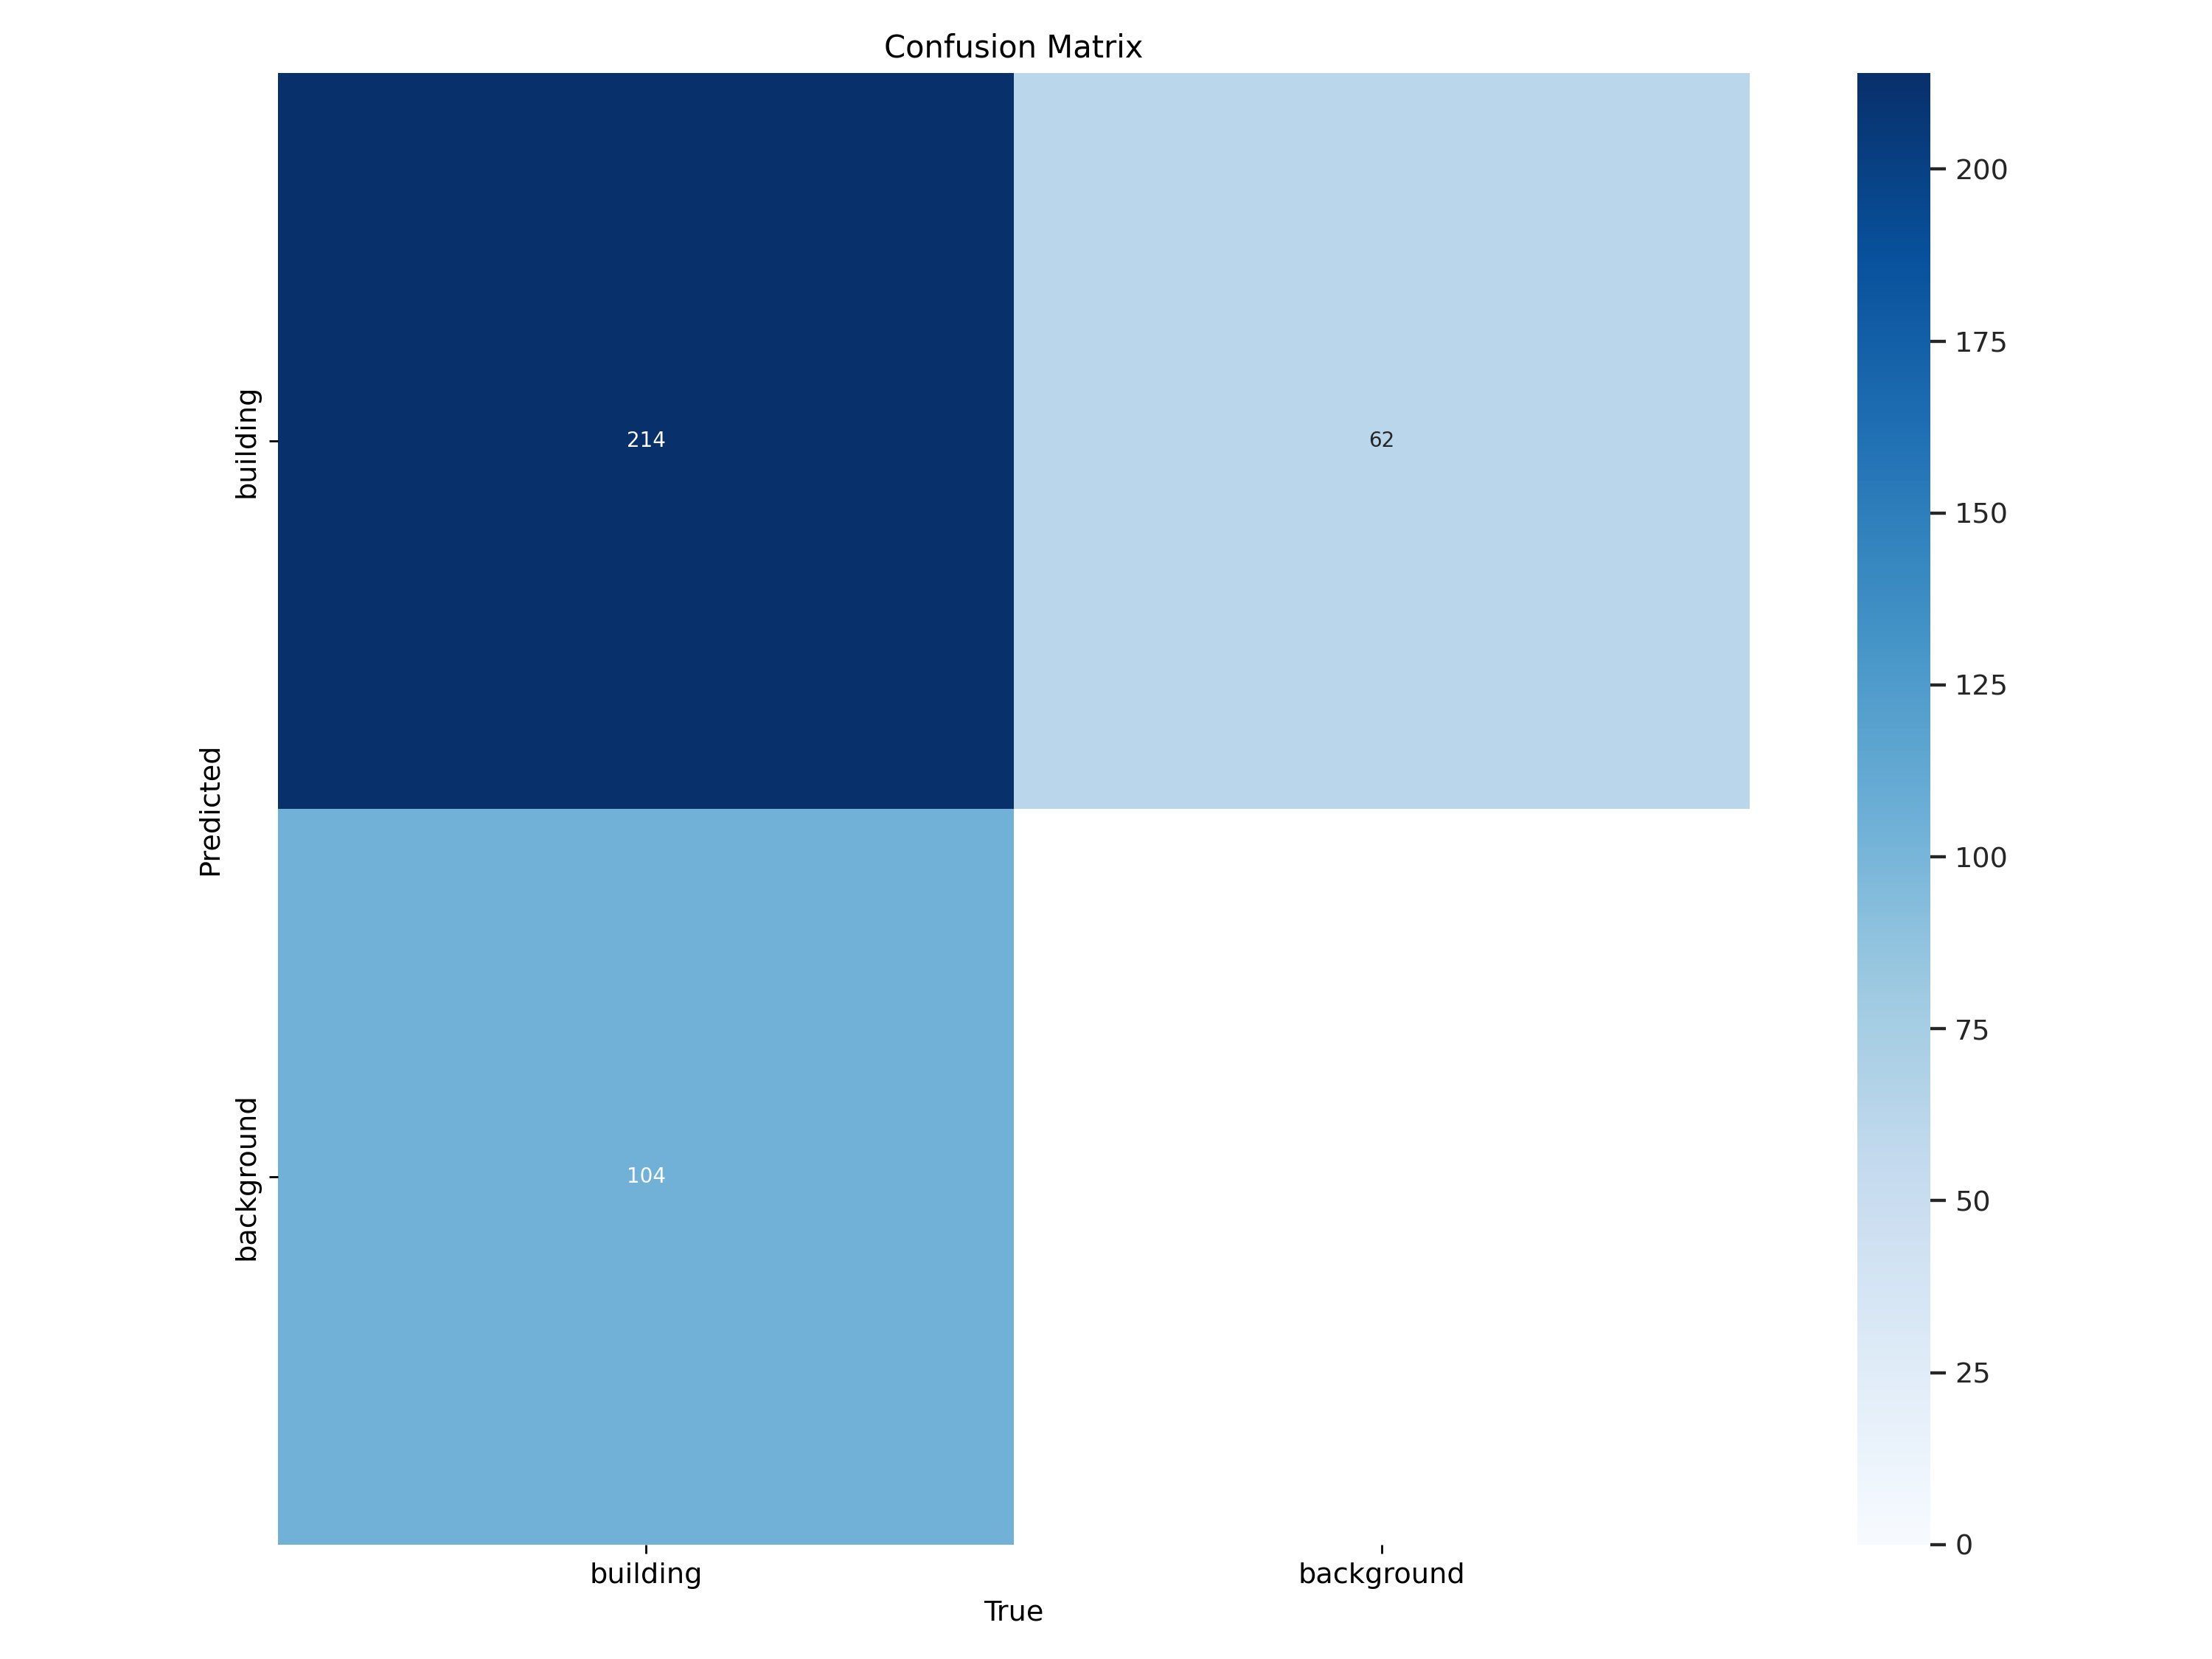

In [ ]:
Image(filename=f'/content/runs/segment/train/confusion_matrix.png', width=600)


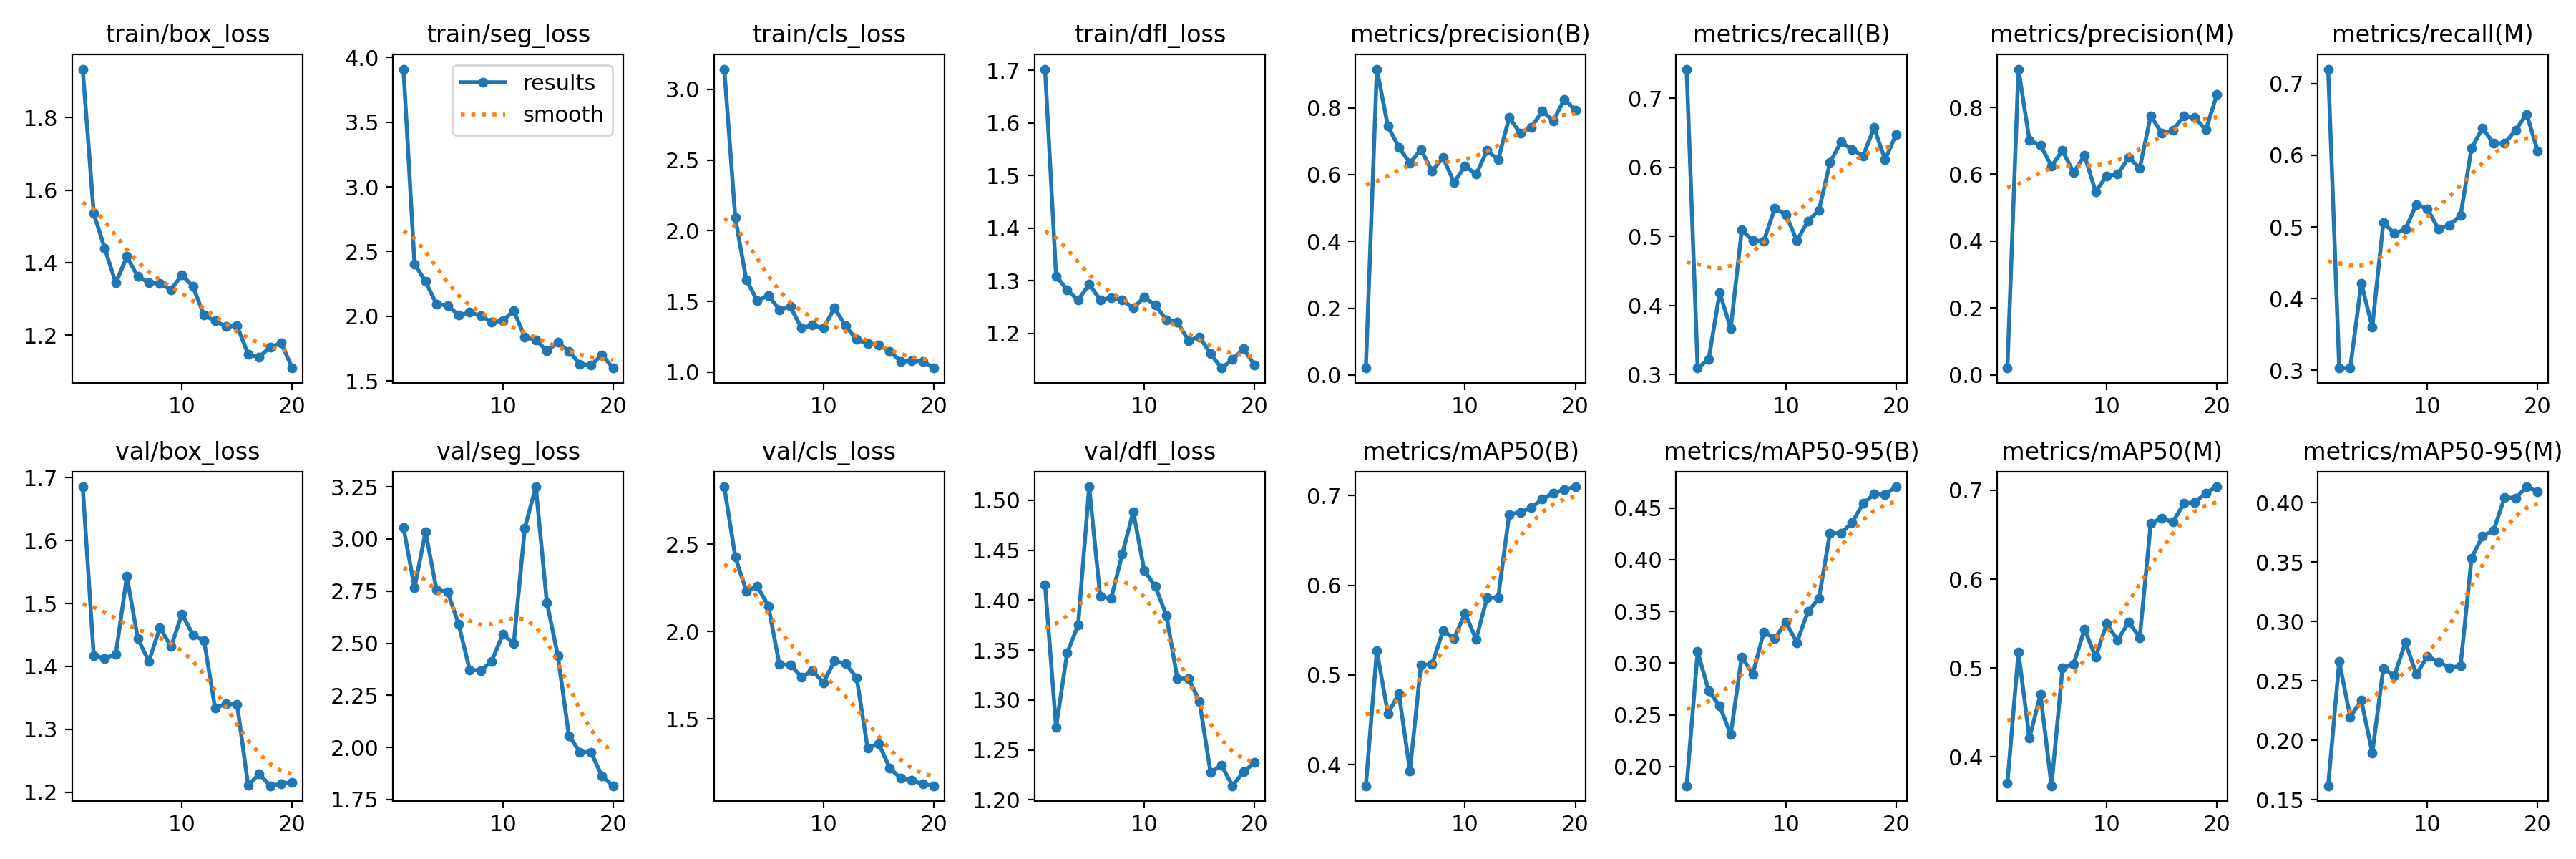

In [ ]:
Image(filename=f'/content/runs/segment/train/results.png', width=600)

In [ ]:
!yolo task=segment model=val model=/content/runs/segment/train/weights/best.pt data={dataset.location}/data.yaml

WARNING ⚠️ 'mode' is missing. Valid modes are ('train', 'val', 'predict', 'export', 'track', 'benchmark'). Using default 'mode=train'.
Ultralytics YOLOv8.0.202 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=/content/runs/segment/train/weights/best.pt, data=/content/questao3-1/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1,

In [ ]:
!yolo task=segment mode=predict model=/content/runs/segment/train/weights/best.pt conf=0.5 source={dataset.location}/test/images save=True


Ultralytics YOLOv8.0.202 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258259 parameters, 0 gradients, 12.0 GFLOPs

image 1/19 /content/questao3-1/test/images/000000006433_jpg.rf.9e05f0dbfc94e001d23ad648bd146189.jpg: 640x640 3 buildings, 11.9ms
image 2/19 /content/questao3-1/test/images/000000026991_jpg.rf.681680165be063bdf05b75db7d5cc668.jpg: 640x640 (no detections), 11.9ms
image 3/19 /content/questao3-1/test/images/000000046630_jpg.rf.dd68bc8a347765f8902b48ee836f8637.jpg: 640x640 3 buildings, 11.7ms
image 4/19 /content/questao3-1/test/images/000000051604_jpg.rf.85f3863056a05c1ea52823c9a12dce68.jpg: 640x640 9 buildings, 9.1ms
image 5/19 /content/questao3-1/test/images/000000058884_jpg.rf.b646ae5bd721a2b54884a533f9ffaadd.jpg: 640x640 1 building, 9.1ms
image 6/19 /content/questao3-1/test/images/000000096512_jpg.rf.ee92683b99926d0e8c3c95d96f62dcd1.jpg: 640x640 2 buildings, 9.1ms
image 7/19 /content/questao3-1/test/images/00000009

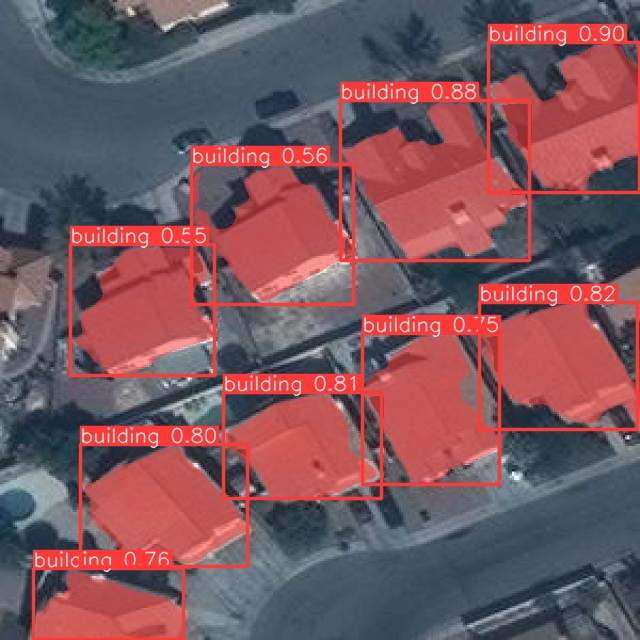

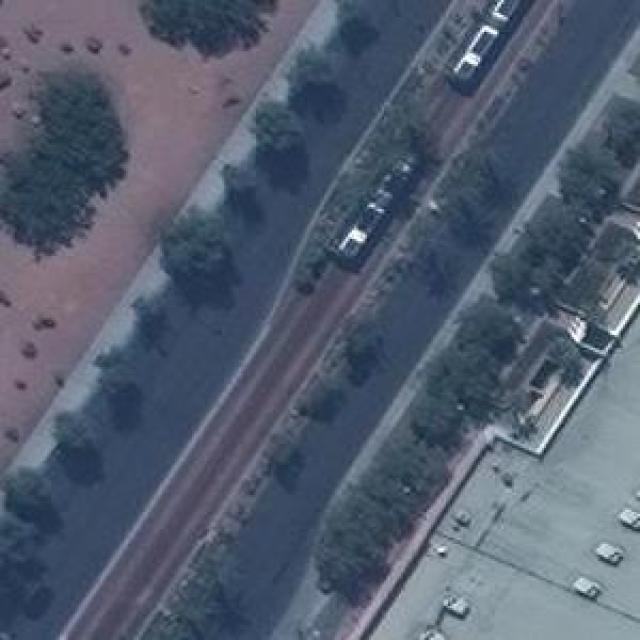

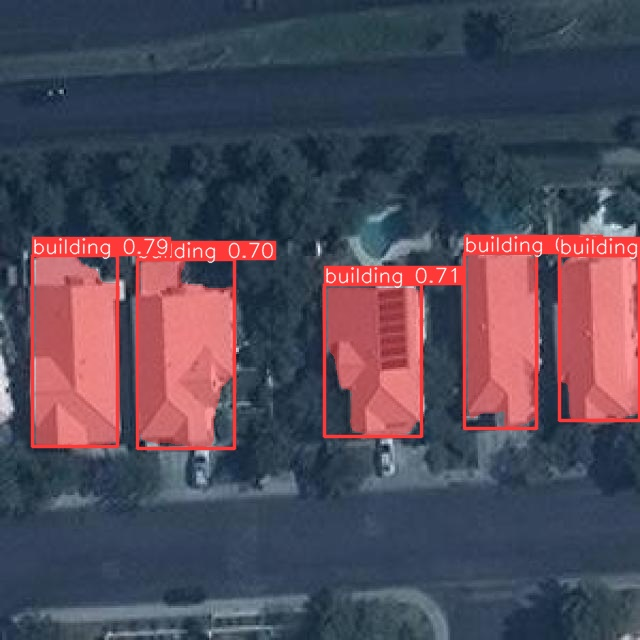

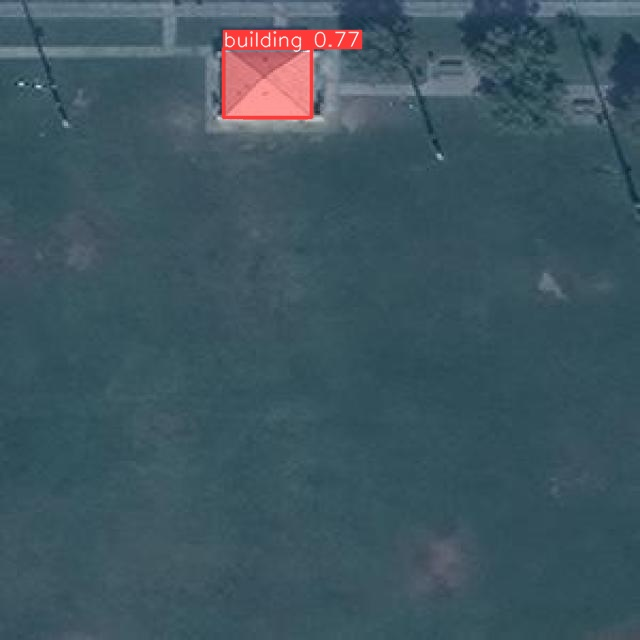

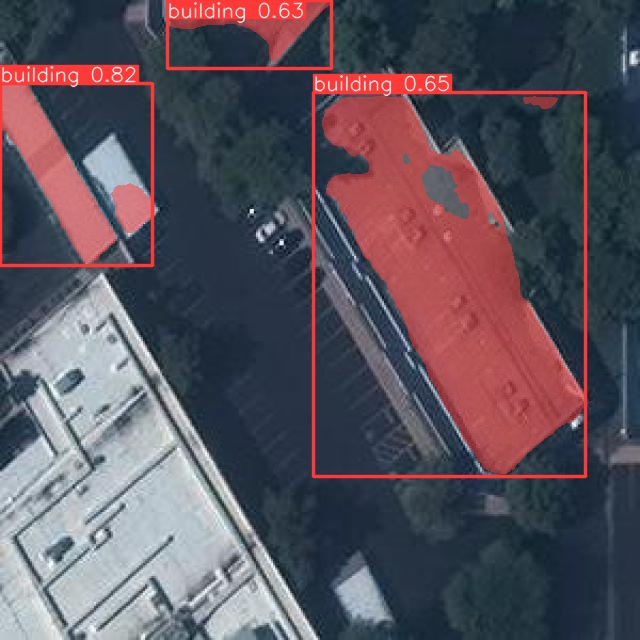

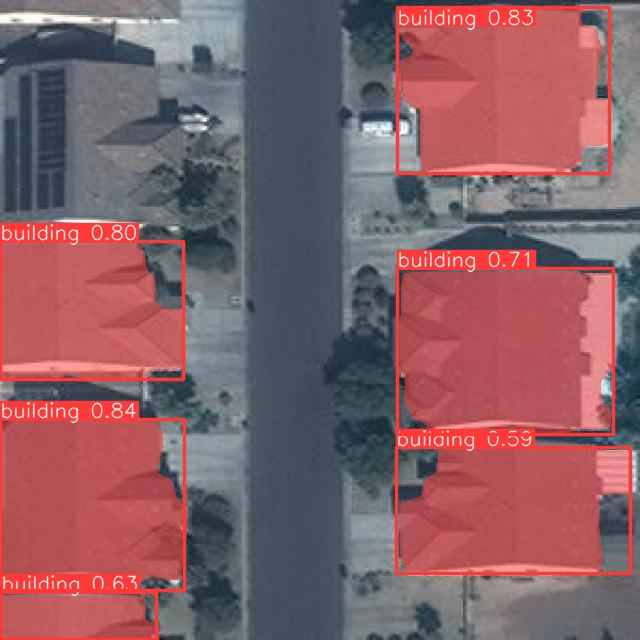

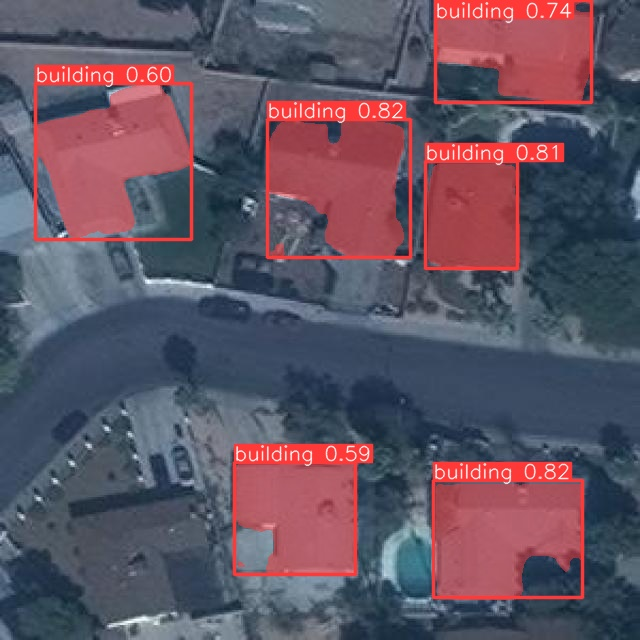

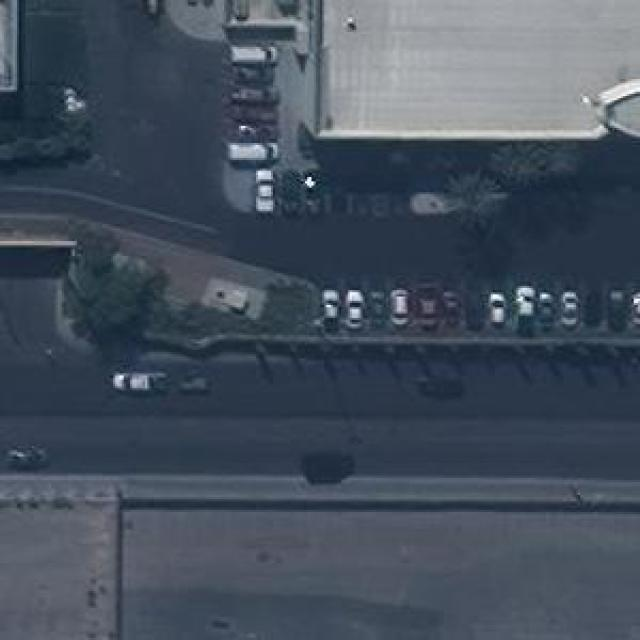

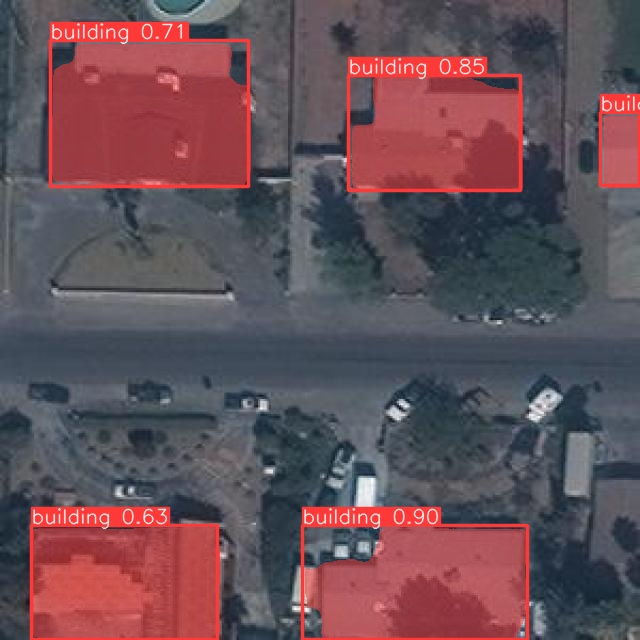

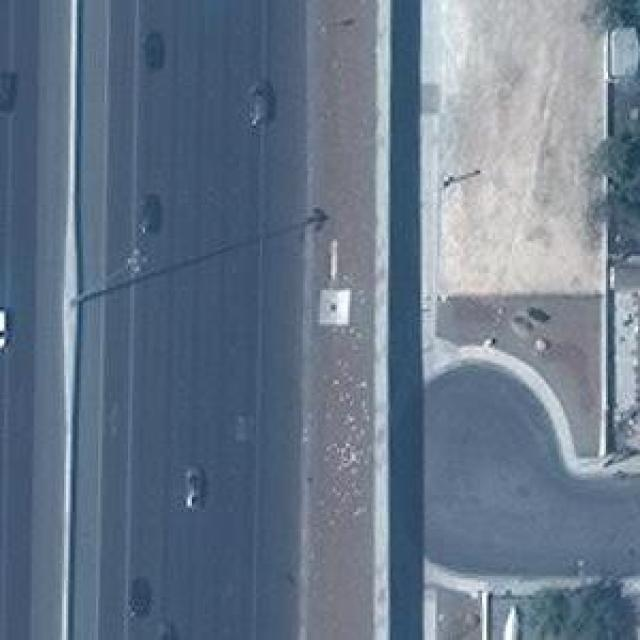

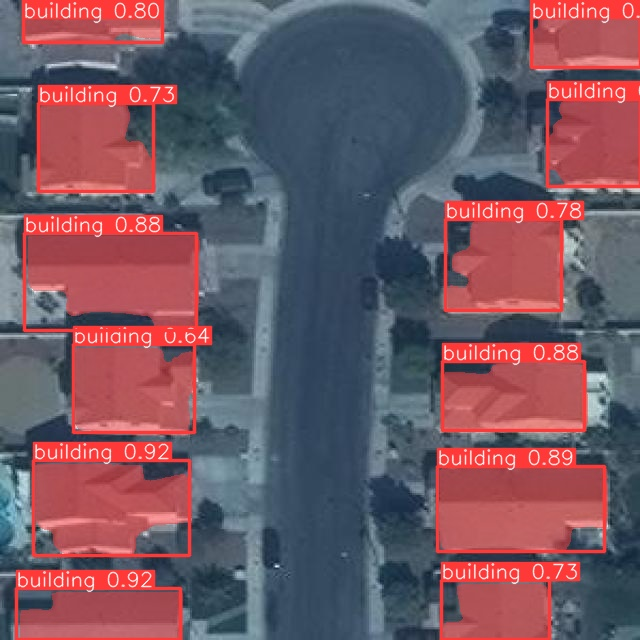

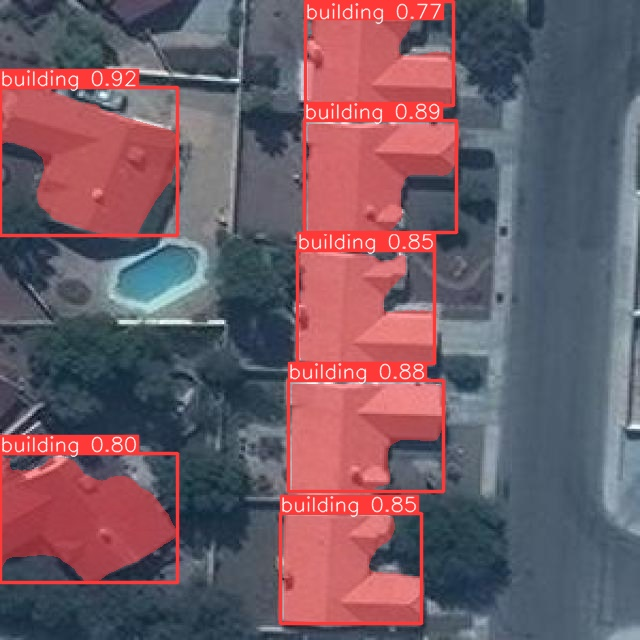

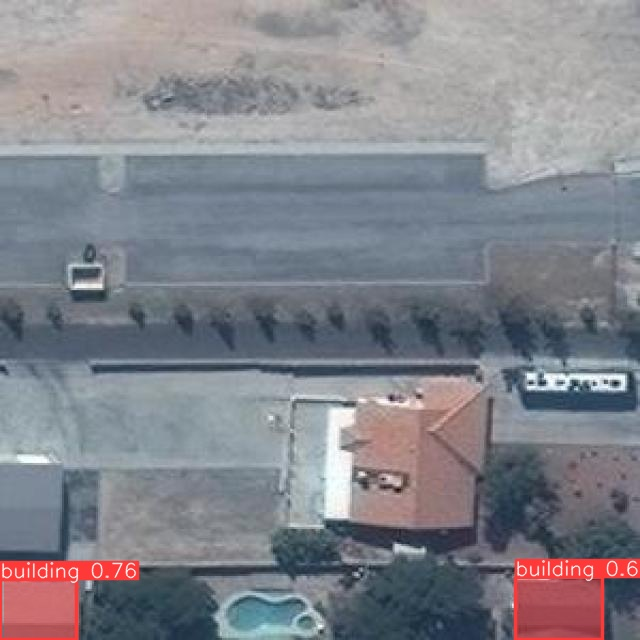

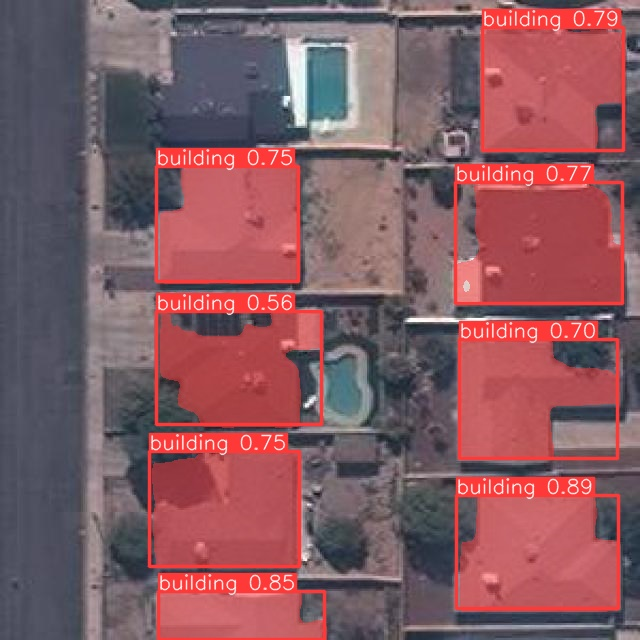

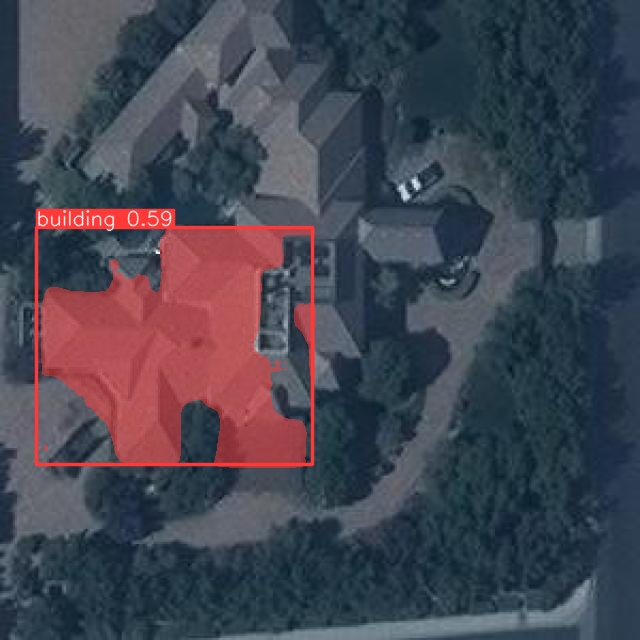

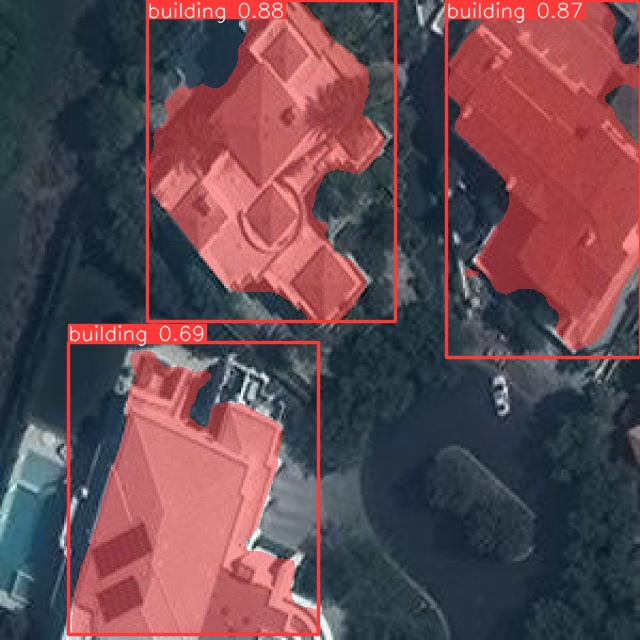

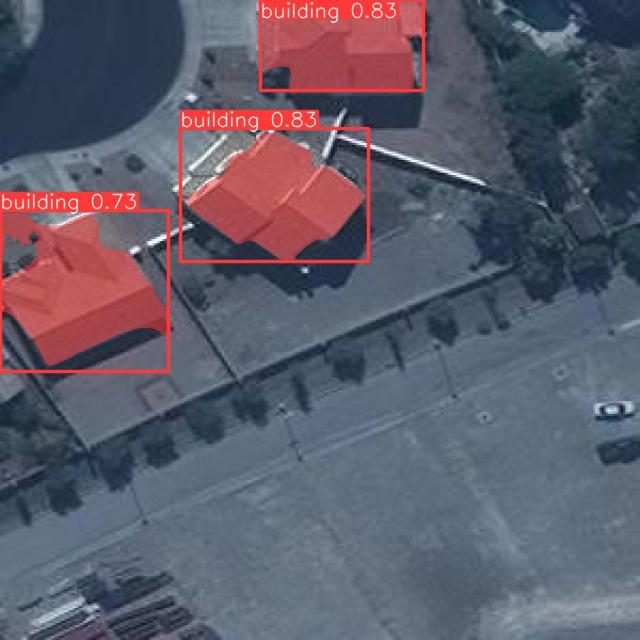

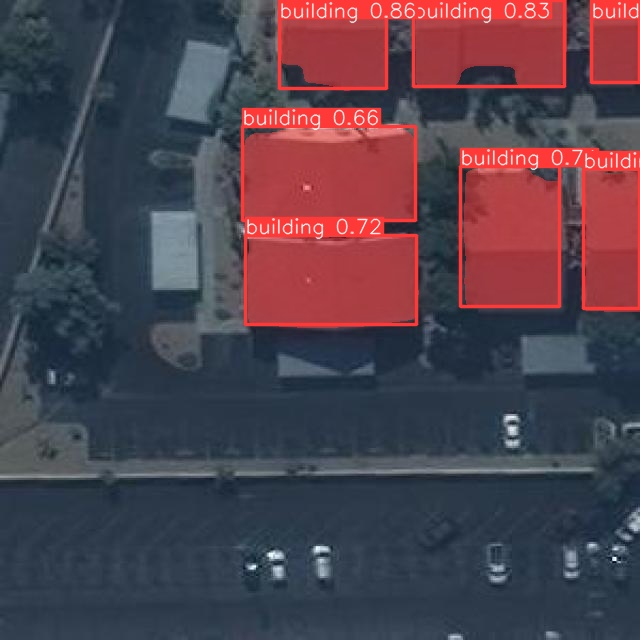

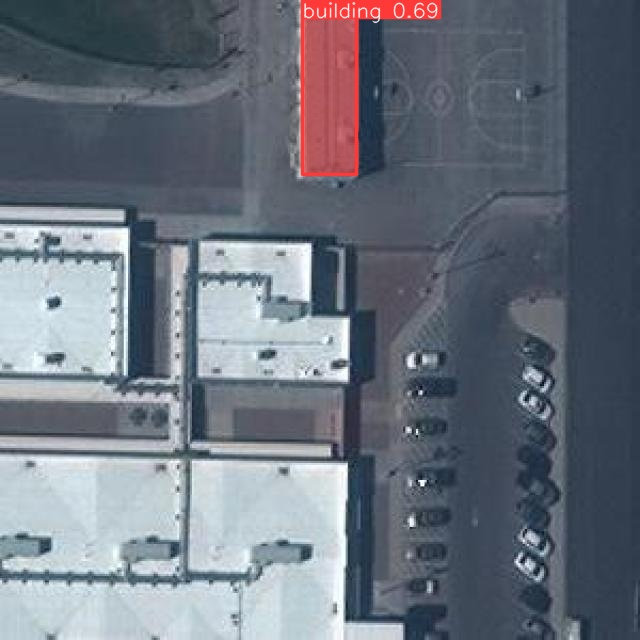

In [ ]:
import glob
import shutil
from IPython.display import Image, display

# Defina a pasta de saída no seu computador local
output_folder = '/content/drive/MyDrive/FIESC_Prova/YOLOV8'
# Certifique-se de que a pasta de saída existe
#if not os.path.exists(output_folder):
    #os.makedirs(output_folder)

# Loop sobre os arquivos de imagem
for image_path in glob.glob(f'/content/runs/segment/predict/*.jpg'):
    # Exibir a imagem (se necessário)
    display(Image(filename=image_path, height=600))

    # Copiar a imagem para a pasta de saída no seu computador local
    output_file = os.path.join(output_folder, os.path.basename(image_path))
    shutil.copy(image_path, output_file)
